In [6]:
# Basic Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# modelling
from sklearn.metrics import mean_squared_error,r2_score,f1_score,accuracy_score,precision_score,recall_score,classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [7]:
df=pd.read_csv("P:\\customer_churn\\telecom_customer_churn\\telecom_customer_churn_project\\notebook\\preprocessing_data.csv")

In [8]:
df.head()

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,0,37,1,0,34.827662,-118.999073,2,9,4,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,1,46,0,0,34.162515,-118.203869,0,9,4,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,2,1,50,0,0,33.645672,-117.922613,0,4,4,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,3,1,78,1,0,38.014457,-122.115432,1,13,3,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,4,0,75,1,0,34.227846,-119.079903,3,3,3,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [10]:
df.shape

(4835, 31)

In [11]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

### Train Test Split

In [12]:
X=df.drop('Customer Status',axis=1)
y=df['Customer Status']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


### Remove Outlier from train Data using Z-Score

In [15]:
from scipy import stats


# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


# Calculate the Z-score for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))


# Set a threshold value for outlier detection(e.g.,3)
threshold = 3


# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]


# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])


## DecisionTreeClassifier

accuray is: 75.39
F1 is: 0.82
Precision is: 0.83
Recall is: 0.8


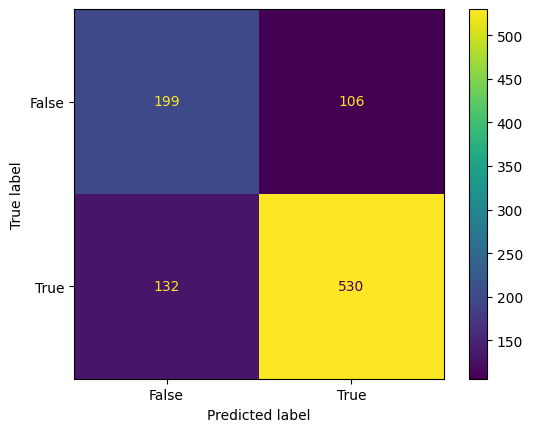

True negative: 199
False postive: 106
False negative: 132
True postive: 530


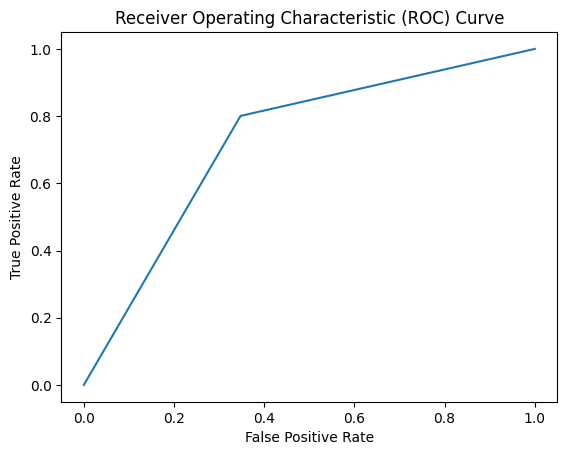

In [17]:
### All together
# =======================Step-1:  divide data into input and target=====================================


X = df.drop('Customer Status', axis=1)
y = df['Customer Status']


# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# ========================Step-3: Outlier analysis based on z-score========================================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ===============================Step-4:  Train the Model===================================================

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

from sklearn.metrics import roc_curve

# Calculate ROC curve
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_dt_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

## Logistic Regression

p:\PROJECTS\ML_Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuray is: 76.32
F1 is: 0.83
Precision is: 0.82
Recall is: 0.83


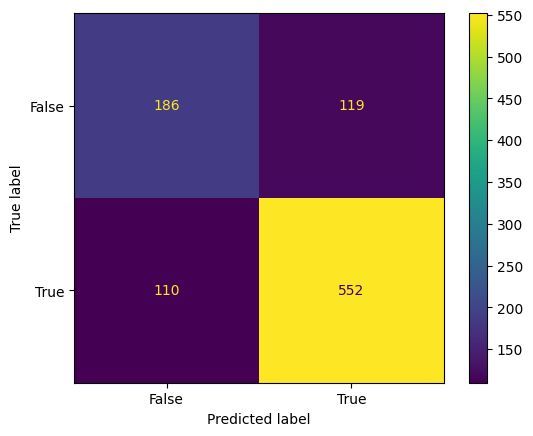

True negative: 186
False postive: 119
False negative: 110
True postive: 552


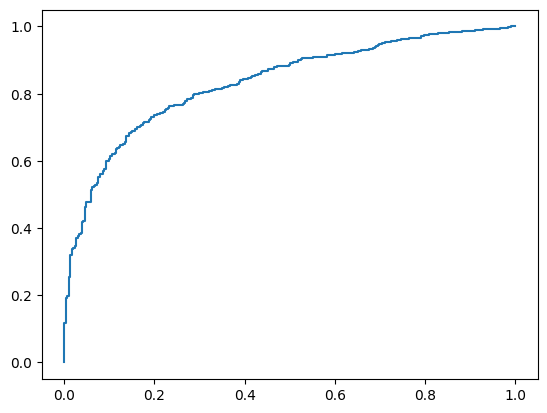

In [18]:
# ===============================Step-1:  Train the Model===================================================

from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

# =============================Step-2:  Predictions============================================================

y_pred_log=logtree.predict(X_test)

# ============================ Step-3: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

# ================================Step-4:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-5: ROC-AUC curve================================================================

y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

## Naive Bayes

accuray is: 75.59
F1 is: 0.81
Precision is: 0.87
Recall is: 0.75


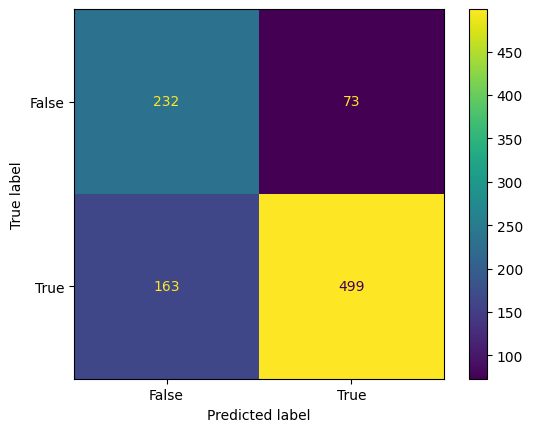

True negative: 232
False postive: 73
False negative: 163
True postive: 499


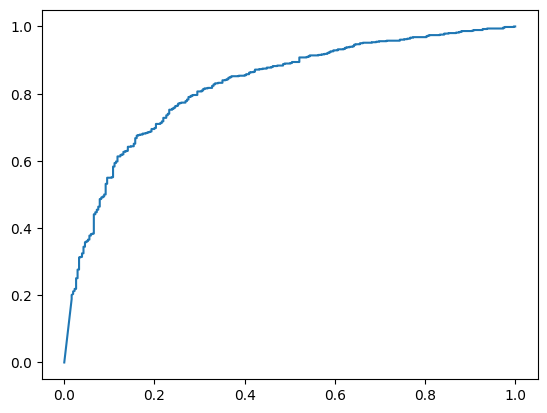

In [19]:

# ===============================Step-1:  Train the Model===================================================

from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

# =============================Step-2:  Predictions============================================================

y_pred_NB=NBtree.predict(X_test)

# ============================ Step-3: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

# ================================Step-4:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-5: ROC-AUC curve================================================================

y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

## KNN

accuray is: 73.32
F1 is: 0.81
Precision is: 0.79
Recall is: 0.84


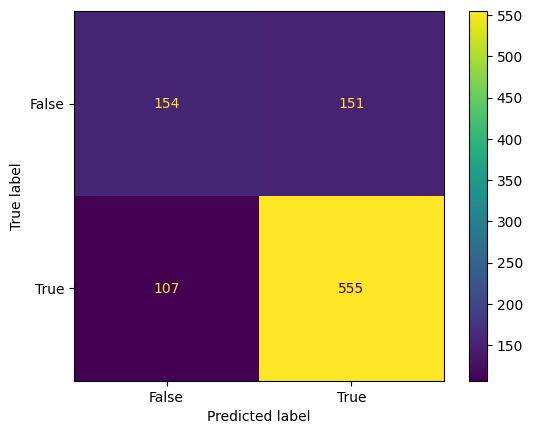

True negative: 154
False postive: 151
False negative: 107
True postive: 555


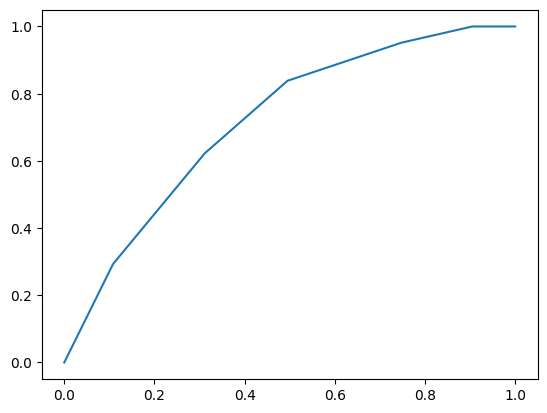

In [20]:

# ===============================Step-1:  Train the Model===================================================

from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

# =============================Step-2:  Predictions============================================================

y_pred_KNN=KNNtree.predict(X_test)

# ============================ Step-3: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

# ================================Step-4:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-5: ROC-AUC curve================================================================

y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# Random Forest

accuray is: 82.63
F1 is: 0.88
Precision is: 0.85
Recall is: 0.9


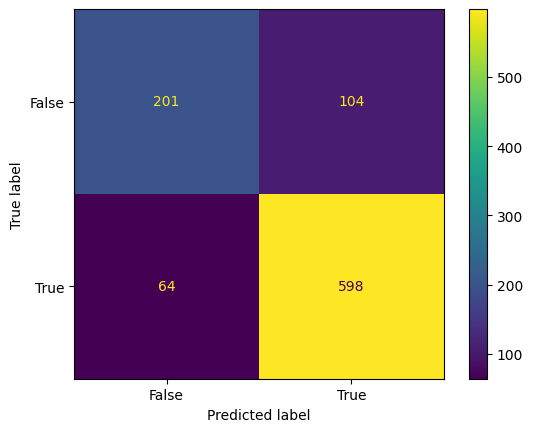

True negative: 201
False postive: 104
False negative: 64
True postive: 598


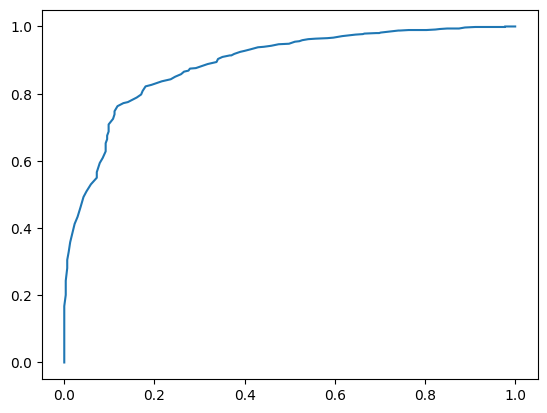

In [21]:


# ===============================Step-1:  Train the Model===================================================

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Step-2:  Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Step-3: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Step-4:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-5: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


In [22]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

# Yu can add Confusion matrix details
# Based on f1-score model is good 
# P and R on f1-score
# Tp,fp,tn,fn ====== P and R

,Accuracy,Precision,Recall,F1-score
DT,75.39,0.83,0.80,0.82
KNN,73.32,0.79,0.84,0.81
Logistic,76.32,0.82,0.83,0.83
Naive Bayes,75.59,0.87,0.75,0.81
Random Forest,82.63,0.85,0.90,0.88


# With hyper paramater tuning

In [23]:
## All together

#================================ Step-1: Get the base model===========================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()   # Base model
RF_params=[keys for keys in grid_RF.get_params()]
print("avialable parameters for model:",RF_params)

print("==========================================================================================")

#================================ Step-2: Create a dictionary for params=================================
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

print("Processing parameters are:",param_grid)

print("===============================================================================================")

#============================== Step-3: Apply the Grid serach======================================
grid_search = GridSearchCV(grid_RF,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

#============================= Step-4: fit the model with train data ===============================
grid_search.fit(X_train,y_train)

#============================= Step-5: Get the best parameters=====================================
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

avialable parameters for model: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
Processing parameters are: {'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'max_features': ['sqrt', 'log2', None], 'random_state': [0, 42]}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'n_estimators': 200, 'random_state': 42}
best train accuracy: 0.8188267813267813


### Developing Random forest with best parameters:

accuray is: 82.52
F1 is: 0.88
Precision is: 0.85
Recall is: 0.91


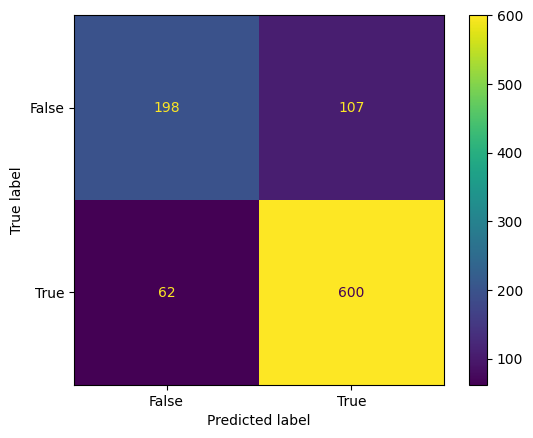

True negative: 198
False postive: 107
False negative: 62
True postive: 600


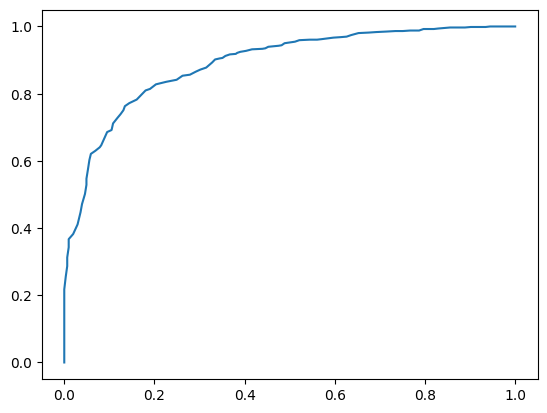

In [24]:
# ===============================Step-4:  Train the Model===================================================

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


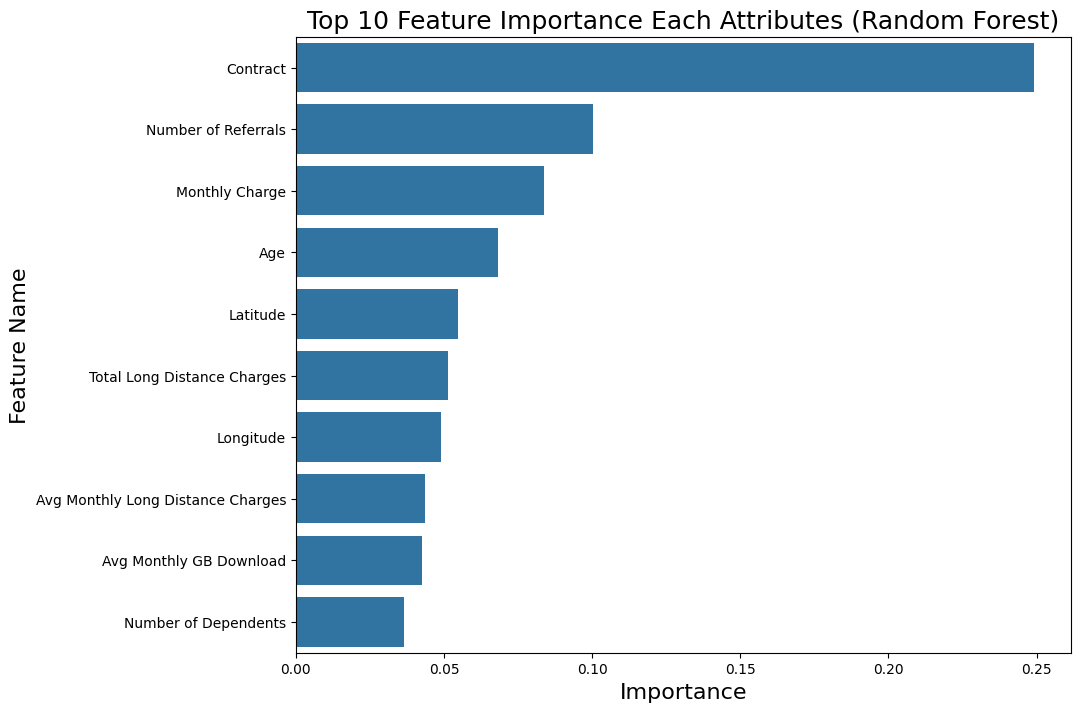

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8200620475698035')

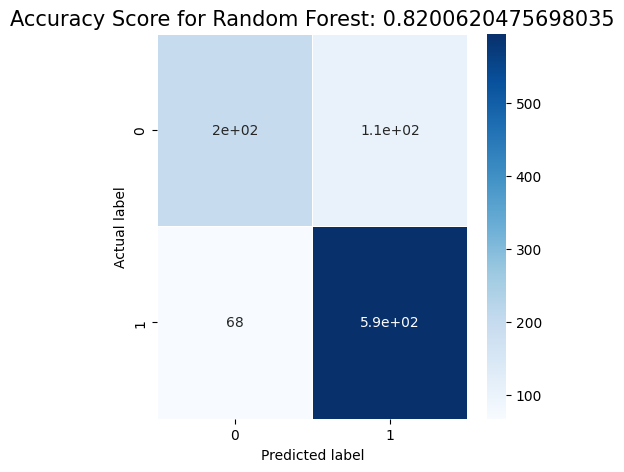

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

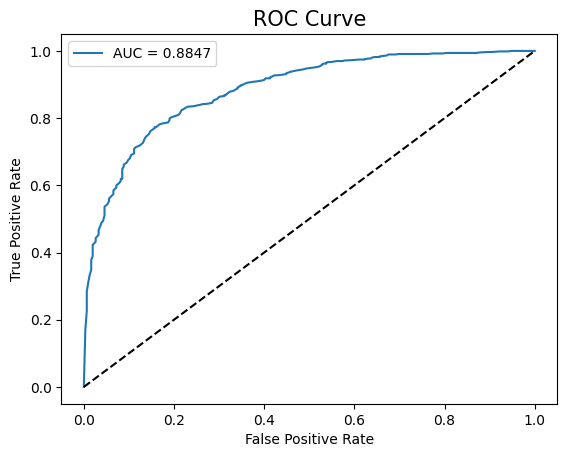

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi


,Feature Name,Importance
21,Contract,0.249064
6,Number of Referrals,0.100159
24,Monthly Charge,0.083835
1,Age,0.068289
4,Latitude,0.054863
28,Total Long Distance Charges,0.051493
5,Longitude,0.049067
9,Avg Monthly Long Distance Charges,0.043764
12,Avg Monthly GB Download,0.042514
3,Number of Dependents,0.036501


In [28]:
# Load the model from disk
import pickle
pickle.dump(RFtree,open('Tele_model_random_forest.pkl','wb'))


In [ ]:
model=pickle.load(open('Tele_model_random_forest.pkl','wb'))
model